In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NG_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130,322,0.0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115,564,0.0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124,261,0.0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128,263,0.0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120,269,0.0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172,199,1.0,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120,263,0.0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140,294,0.0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140,192,0.0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	2
float64		column 3	2
int64		column 4	0
int64		column 5	0
float64		column 6	3
int64		column 7	0
float64		column 8	2
float64		column 9	3
float64		column 10	0
float64		column 11	2
float64		column 12	5
float64		column 13	4


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,269.000000,268.000000,268.000000,270.000000,270.000000,267.000000,270.000000,268.000000,267.000000,270.00000,268.000000,265.000000,266.000000
mean,0.680297,54.361940,3.182836,131.344444,249.659259,0.142322,1.022222,149.567164,0.333333,1.05000,1.585821,0.671698,4.691729
std,0.467231,9.103626,0.948172,17.861608,51.686237,0.350036,0.997891,23.211759,0.472290,1.14521,0.615122,0.938321,1.939385
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,0.000000,47.750000,3.000000,120.000000,213.000000,0.000000,0.000000,132.750000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.000000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


<AxesSubplot:>

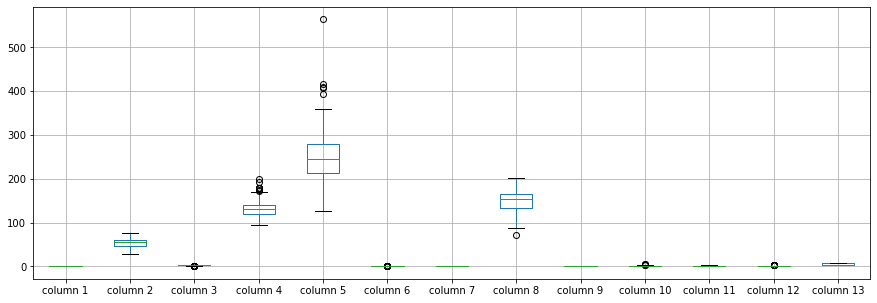

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.680297
column 2      54.361940
column 3       3.182836
column 4     131.344444
column 5     249.659259
column 6       0.142322
column 7       1.022222
column 8     149.567164
column 9       0.333333
column 10      1.050000
column 11      1.585821
column 12      0.671698
column 13      4.691729
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.098678,0.034801,-0.061534,-0.195824,0.045579,0.044802,-0.076400,0.178380,0.092969,0.046588,0.081464,0.396338
column 2,-0.098678,1.000000,0.097131,0.270073,0.220347,0.128341,0.137361,-0.393334,0.088220,0.197867,0.149961,0.363199,0.098347
column 3,0.034801,0.097131,1.000000,-0.044671,0.086668,-0.111624,0.074827,-0.307848,0.355423,0.160906,0.136911,0.225144,0.258364
column 4,-0.061534,0.270073,-0.044671,1.000000,0.173019,0.154564,0.116157,-0.036878,0.078730,0.222800,0.140068,0.094298,0.130000
column 5,-0.195824,0.220347,0.086668,0.173019,1.000000,0.023129,0.167652,-0.022661,0.073387,0.027709,-0.004211,0.162749,0.025957
column 6,0.045579,0.128341,-0.111624,0.154564,0.023129,1.000000,0.053860,0.037166,0.012153,-0.019563,0.039294,0.083226,0.028733
column 7,0.044802,0.137361,0.074827,0.116157,0.167652,0.053860,1.000000,-0.079749,0.093073,0.120034,0.160589,0.118620,-0.008093
column 8,-0.076400,-0.393334,-0.307848,-0.036878,-0.022661,0.037166,-0.079749,1.000000,-0.394493,-0.346346,-0.380463,-0.252533,-0.248451
column 9,0.178380,0.088220,0.355423,0.078730,0.073387,0.012153,0.093073,-0.394493,1.000000,0.273148,0.258961,0.159502,0.333488
column 10,0.092969,0.197867,0.160906,0.222800,0.027709,-0.019563,0.120034,-0.346346,0.273148,1.000000,0.607573,0.258284,0.314710


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [14]:
imputer = md.Midas(layer_structure = [13,13+18,13+18+18,13+18+18+18,13+18+18+18+18,13+18+18+18+18+18,13+18+18+18+18,13+18+18+18,13+18+18,13+18,13], vae_layer = False, seed = 18)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 607.5166893005371
Epoch: 1 , loss: 607.0716171264648
Epoch: 2 , loss: 606.3574523925781
Epoch: 3 , loss: 608.3549156188965
Epoch: 4 , loss: 608.6538314819336
Epoch: 5 , loss: 606.6140098571777
Epoch: 6 , loss: 606.3522415161133
Epoch: 7 , loss: 608.0615386962891
Epoch: 8 , loss: 607.6541442871094
Epoch: 9 , loss: 608.288818359375
Epoch: 10 , loss: 607.5793380737305
Epoch: 11 , loss: 607.7131309509277
Epoch: 12 , loss: 607.0432815551758
Epoch: 13 , loss: 608.1260681152344
Epoch: 14 , loss: 608.7829551696777
Epoch: 15 , loss: 607.4776268005371
Epoch: 16 , loss: 607.7132148742676
Epoch: 17 , loss: 607.8791046142578
Epoch: 18 , loss: 606.6630058288574
Epoch: 19 , loss: 605.7552337646484
Epoch: 20 , loss: 607.400447845459
Epoch: 21 , loss: 605.2728538513184
Epoch: 22 , loss: 606.9094200134277
Epoch: 23 , loss: 606.6663665771484
Epoch: 24 , loss: 607.0740547180176
Epoch: 25 , loss: 608.1915512084961
Epoch: 2

In [15]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [16]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      48.000000
column 3       0.105202
column 4     130.000000
column 5     245.000000
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      0.200000
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [17]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [18]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [19]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [20]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [21]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(249.53258850921299, 5414.752392307519)

In [22]:
NRMS=numerator/denominator
NRMS


0.046083841038366234

In [23]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [24]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130,322,0.0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115,564,0.0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124,261,0.0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128,263,0.0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120,269,0.0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172,199,1.0,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120,263,0.0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140,294,0.0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140,192,0.0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [25]:
imputations[-1].to_excel("Sheart_NG_1(imp).xlsx", index=False, header=False)